<a href="https://colab.research.google.com/github/Msamuelsons/recomendar-anime/blob/main/anime_wave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visão Geral
**Este documento descreve a implementação e uso de um modelo de recomendação de animes construído com a biblioteca Surprise. O modelo é projetado para sugerir animes com base nas preferências e histórico de visualização do usuário. O Surprise é uma biblioteca Python amplamente utilizada para sistemas de recomendação e tem uma variedade de algoritmos de filtragem colaborativa implementados para gerar recomendações personalizadas.**



dataset utilizado [dataset de anime do kaggle](https://)

`Para conhecer mais sobre o surprise acesse: ` [Surprise](https://surpriselib.com/)

In [1]:
# Instalação do biblioteca surprise
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163355 sha256=fe506342684d239cacddca99245754c14c707cf1b64c1beba9d5a5cf453cf30b
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [2]:
# importações
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from surprise import KNNBasic
import surprise
from surprise import Dataset
from surprise import Reader
from surprise import SVDpp
from surprise.model_selection import train_test_split
from surprise import accuracy

# Carregamento dos dados

In [3]:
try:
  dados_rating = pd.read_csv('/content/rating.csv')
except FileNotFoundError:
  print("O arquivo de dataset não foi encontrado.")
except FileExistsError:
  print("O arquivo de dataset não existe.")


# Carregamento de Labels

In [4]:

try:
  dados_anime = pd.read_csv('/content/anime.csv')
except FileNotFoundError:
  print("O arquivo de dataset não foi encontrado.")
except FileExistsError:
  print("O arquivo de dataset não existe.")


In [5]:
anime = dados_anime[['anime_id', 'name']]
anime

,anime_id,name
0,32281,Kimi no Na wa.
1,5114,Fullmetal Alchemist: Brotherhood
2,28977,Gintama°
3,9253,Steins;Gate
4,9969,Gintama&#039;
...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami
12290,5543,Under World
12291,5621,Violence Gekiga David no Hoshi
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...


# Análise exploratória

In [6]:
dados_rating.head(3)

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1


In [7]:
# Quantidade de dados
print(f'Os dados possuem {dados_rating.shape[0]} linhas e {dados_rating.shape[1]} colunas')

Os dados possuem 1321504 linhas e 3 colunas


In [8]:
dados_rating['rating'].describe()

count    1.321504e+06
mean     6.151940e+00
std      3.696508e+00
min     -1.000000e+00
25%      6.000000e+00
50%      7.000000e+00
75%      9.000000e+00
max      1.000000e+01
Name: rating, dtype: float64

In [9]:
# Separando o menor avaliado e o maior
menor_avaliado = dados_rating['rating'].min()
maior_avaliado = dados_rating['rating'].max()
print(f'Variação de rating: {menor_avaliado} a {maior_avaliado}')

Variação de rating: -1 a 10


## Avaliações x pessoas
Esse `value_counts()` retorna o número de avaliações em relação a sua nota

In [10]:
dados_rating['rating'].value_counts()

 8     278978
-1     244754
 7     235643
 9     211614
 10    156733
 6     110663
 5      49409
 4      18810
 3       7927
 2       4369
 1       2604
Name: rating, dtype: int64

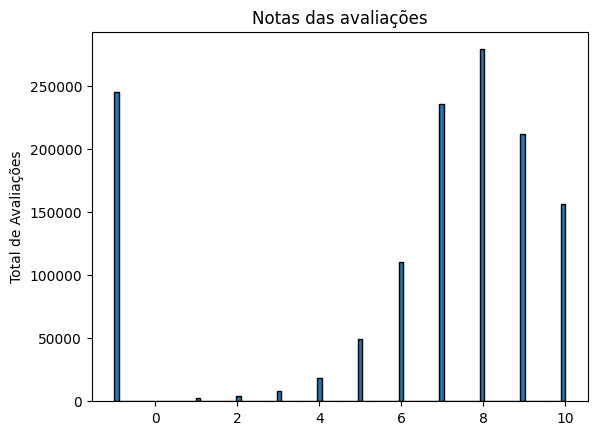

In [11]:
# histograma com intervalos uniformes
dados_rating['rating'].plot(kind='hist', bins=100, edgecolor='k')
plt.ylabel('Total de Avaliações')
plt.title('Notas das avaliações')

plt.show()

In [12]:
# Descobrindo a média das notas dadas
media = dados_rating['rating'].mean()
print(f'Média dos dados de avaliações: {media}')

Média dos dados de avaliações: 6.151939759546698


In [13]:
# Moda das notas
moda = dados_rating['rating'].mode()
print(f'Moda dos dados de avaliações: {float(moda)}')


Moda dos dados de avaliações: 8.0


In [14]:
# Mediana
mediana = dados_rating['rating'].median()
print(f'Mediana dos dados de avaliações: {mediana}')


Mediana dos dados de avaliações: 7.0


In [15]:
# Valores e suas quantidades
quantidade_de_animes = len(dados_rating['anime_id'].unique())
quantidade_de_usuarios = len(dados_rating['user_id'].unique())
quantidade_de_amostras = dados_rating.shape[0]

print(f'Total de animes: {quantidade_de_animes}')
print(f'Total de usuários: {quantidade_de_usuarios}')
print(f'Total de amostras: {quantidade_de_amostras}')

Total de animes: 9018
Total de usuários: 12521
Total de amostras: 1321504


## Verificando valores faltantes

In [16]:
dados_rating.isnull().sum()

user_id     0
anime_id    0
rating      0
dtype: int64

In [17]:
dados_rating['rating'].fillna(7, inplace=True)

# Preparando o dataset

Especificando o intervalo ou faixa de valores esperados em seu conjunto de dados. Isso é útil para informar ao Surprise qual é o intervalo de classificação dos seus dados.

In [18]:
reader = Reader(rating_scale=(-1, 10))
dados = Dataset.load_from_df(dados_rating[['user_id', 'anime_id', 'rating']], reader)

# Treinando o modelo

# Ajuste fino
Fica ai pra quem se interessar em fazer o ajuste fino dos parâmetros

In [19]:
# # Ajustando os parâmetros:

# param_grid = {'lr_all': [.007, .01, 0.05, 0.001], 'reg_all': [0.02, 0.005]}
# surprise_grid = surprise.model_selection.GridSearchCV(surprise.SVDpp, param_grid, measures=['rmse'], cv=3, n_jobs=-1)
# surprise_grid.fit(dados)
# print(surprise_grid.best_params['rmse'])

In [20]:
from surprise.model_selection import train_test_split

# Dividindo os dados em treino e teste
treino, teste = train_test_split(dados, test_size=0.2, random_state=5)  # 80% treino, 20% teste

algoritmo = SVDpp(n_factors=20, random_state=5)

# Treinando o modelo com o conjunto de treino
algoritmo.fit(treino)

# Predições

In [21]:
# Fazendo previsões com o conjunto de teste
previsoes = algoritmo.test(teste)

# Para visualizar as predições
print(previsoes)
# O erro na saída signifa que o notebook ultrapassou o limite de amostras para sáida

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



# Encontrando os 10 animes parecidos

In [22]:
def melhores_recomendados(user_id, n=10):
    """
    Retorna as recomendações de animes para um usuário específico.

    Esta função recebe o ID de um usuário e retorna uma lista com as 'n' melhores recomendações de animes para esse usuário.

    Args:
        user_id (int): O ID do usuário para o qual deseja obter recomendações.
        n (int): O número de recomendações a serem retornadas. O padrão é 10.

    Returns:
        list: Uma lista contendo as 'n' melhores recomendações de animes para o usuário, ordenadas por pontuação prevista.
    """

    # Lista para armazenar todas as previsões do usuário
    user_predictions = []

    # Recuperando todos os animes que o usuário já avaliou
    watched_animes = dados_rating[dados_rating['user_id'] == user_id]['anime_id'].tolist()

    # Calculando a previsão de avaliação para cada anime que o usuário ainda não avaliou
    for anime_id in dados_rating['anime_id'].unique():
        if anime_id not in watched_animes:
            predicted_rating = algoritmo.predict(user_id, anime_id).est
            user_predictions.append((anime_id, predicted_rating))

    # Classificando as previsões em ordem decrescente
    user_predictions.sort(key=lambda x: x[1], reverse=True)

    # Retorna a lista com as recomendações
    return [anime_id for anime_id, _ in user_predictions[:n]]




In [23]:
animes_recomendados_para_id = melhores_recomendados(200, n=10)
titulos_correspondentes = []

# Loop para encontrar os títulos correspondentes
for id_anime in animes_recomendados_para_id:
    titulo = anime.loc[anime['anime_id'] == id_anime, 'name'].values[0]
    titulos_correspondentes.append((id_anime, titulo))

for id_anime, titulo in titulos_correspondentes:
    print(f"{titulo}")

School Rumble
School Rumble Ni Gakki
Tengen Toppa Gurren Lagann
Kuroko no Basket
Sakurasou no Pet na Kanojo
Kami nomi zo Shiru Sekai: Megami-hen
Hyouka
Shaman King
Slam Dunk
Fullmetal Alchemist: The Conqueror of Shamballa


# KNN

O knn tem a função de encontrar os animes mais parecidos

In [24]:
# Procurando os animes parecidos com pokemon
anime['anime_id'].loc[anime['name'] == 'Pokemon']

1834    527
Name: anime_id, dtype: int64

In [25]:
# Treinando o modelo KNNBasic para similaridade de itens
sim_options = {'name': 'cosine', 'user_based': False}  # compute similarities between items
knn = KNNBasic(sim_options=sim_options)
knn.fit(dados.build_full_trainset())

def animes_similares(anime_id, n=10):
    """
    Retorna os 'n' animes mais similares para um anime específico.

    Args:
        anime_id (int): O ID do anime para o qual deseja obter animes similares.
        n (int): O número de animes similares a serem retornados. O padrão é 10.

    Returns:
        list: Uma lista contendo os 'n' animes mais similares.
    """


    anime_inner_id = knn.trainset.to_inner_iid(anime_id)
    neighbors = knn.get_neighbors(anime_inner_id, k=n)

    neighbors_raw_ids = [knn.trainset.to_raw_iid(inner_id) for inner_id in neighbors]

    return neighbors_raw_ids

similar_animes_to_id = animes_similares(20, n=10)
similar_anime_titles = []

# Loop para encontrar os títulos correspondentes
for sim_anime_id in similar_animes_to_id:
    title = anime.loc[anime['anime_id'] == sim_anime_id, 'name'].values[0]
    similar_anime_titles.append((sim_anime_id, title))

for sim_anime_id, title in similar_anime_titles:
    print(f"{title}")


Computing the cosine similarity matrix...
Done computing similarity matrix.
Mangchi
Shinano Mainichi Shinbun
Wake Up, Girls! Deai no Kiroku: A Brief Recording
Persona 3 the Movie Meets “Walkman”
Dennou Boukenki Webdiver
Genki Bakuhatsu Ganbaruger
Ganbare Goemon: Chikyuu Kyuushutsu Daisakusen
Genki Bakuhatsu Ganbaruger: Hyakka
Miss Monochrome: Watashi dake no Monogatari
Shin Kyouhaku 2 The Animation: Kizu ni Saku Hana Senketsu no Kurenai


# Resultado

Só explicando como funciona o rmse ele diz sobre quanto o erro pode ter acontecido em relação ao real, exemplo:

> Se o RMSE é 2.0965, isso significa que, em média, o erro entre a previsão e o valor real é de aproximadamente 2.0965. Em outras palavras, se o valor real é 7, a previsão poderia ser em média cerca de 9.0965 ou 4.9035.

In [26]:
from surprise import accuracy
accuracy.rmse(previsoes)

RMSE: 2.2057


2.2057140444354544